In [21]:
from tensorflow.keras.models import load_model
import pandas as pd
from pickle import load
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
%matplotlib inline
sns.set()

In [22]:
model = load_model('new_model_good.h5', compile = False)

In [23]:
data = pd.read_csv('test_with_vanishing.csv')

In [24]:
scaler = load(open('scaler.pkl', 'rb'))

In [25]:
data.head()

,Positions X
0,-5239.66
1,-5239.66
2,-5239.66
3,-5239.66
4,-5239.66


In [26]:
data.dropna(inplace= True)

In [27]:
data.drop_duplicates(inplace= True)

In [28]:
data.shape

(649, 1)

In [29]:
data_scaled = scaler.transform(data)

In [30]:
last_positions = []
real_values = []
for i in range(10, 649):
    last_positions.append(data_scaled[i-10: i, 0])
    real_values.append(data.iloc[i, 0])

In [31]:
last_positions, real_values = np.array(last_positions), np.array(real_values)
last_positions = np.reshape(last_positions, (last_positions.shape[0], last_positions.shape[1], 1))

In [32]:
last_positions.shape

(639, 10, 1)

In [33]:
t0 = time.time()
predictions = model.predict(last_positions)
t1 = time.time()
delta = t1 - t0
delta = round(delta, 2)
print(f'O tempo para prever 639 posições foi: {delta} segundos')

O tempo para prever 639 posições foi: 0.49 segundos


In [34]:
predictions = scaler.inverse_transform(predictions)

In [35]:
data.head()

,Positions X
0,-5239.66
52,-5238.83
54,-5236.56
55,-5232.83
56,-5227.64


In [36]:
data.reset_index(inplace= True, drop= True)

In [37]:
data.head()

,Positions X
0,-5239.66
1,-5238.83
2,-5236.56
3,-5232.83
4,-5227.64


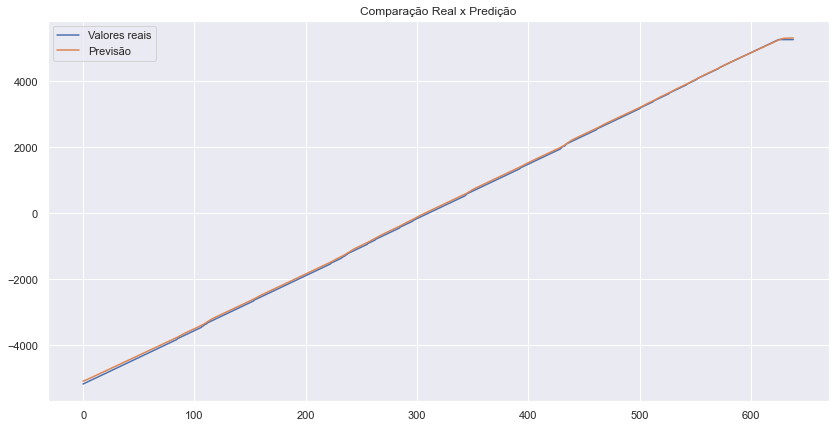

In [42]:
plt.figure(figsize= (14, 7))
plt.title('Comparação Real x Predição')
plt.plot(real_values, label = 'Valores reais')
plt.plot(predictions, label =  'Previsão')
plt.legend()
plt.savefig('real_RNN.png', format='png')

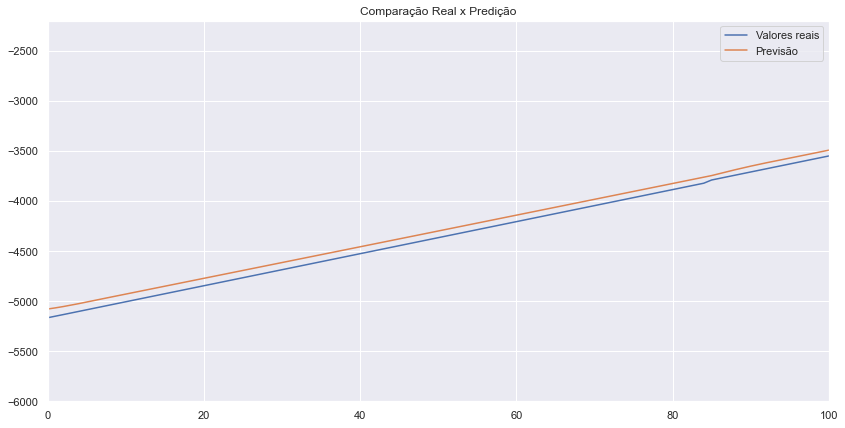

In [43]:
plt.figure(figsize= (14, 7))
plt.axis([0,100, -6000, -2200])
plt.title('Comparação Real x Predição')
plt.plot(real_values, label = 'Valores reais')
plt.plot(predictions, label =  'Previsão')
plt.legend()
plt.savefig('zoom_real_RNN.png', format='png')

In [33]:
predictions = np.reshape(predictions, (-1))

In [35]:
data2compare = pd.DataFrame({'real_values': real_values, 'predictions': predictions})

In [36]:
data2compare.head()

,real_values,predictions
0,-5165.69,-5078.563965
1,-5150.24,-5066.984863
2,-5134.13,-5053.969238
3,-5118.09,-5039.713379
4,-5102.08,-5024.585938


In [41]:
def round_value(value):
    return round(value, 2)
data2compare['predictions'] = data2compare['predictions'].apply(round_value)

In [42]:
data2compare.head()

,real_values,predictions
0,-5165.69,-5078.56
1,-5150.24,-5066.98
2,-5134.13,-5053.97
3,-5118.09,-5039.71
4,-5102.08,-5024.59


In [43]:
mean_absolute_error(data2compare['real_values'], data2compare['predictions'])

42.17801251956178